In [ ]:
pip install openpyxl


In [ ]:
import pandas as pd
import numpy as np

#Loading Data

df = pd.read_excel("Spotify_data.xlsx")
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [ ]:
#Handling Missing Values

df.isnull().sum()

df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)


In [ ]:
#Encode Premium Users
df['premium_user'] = df['premium_sub_willingness'].map({'Yes':1, 'No':0})

In [ ]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

print(df.columns.tolist())


['age', 'gender', 'spotify_usage_period', 'spotify_listening_device', 'spotify_subscription_plan', 'premium_sub_willingness', 'preffered_premium_plan', 'preferred_listening_content', 'fav_music_genre', 'music_time_slot', 'music_influencial_mood', 'music_lis_frequency', 'music_expl_method', 'music_recc_rating', 'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction', 'premium_user']


In [ ]:
import numpy as np

df['churn'] = np.where(
    (df['pod_variety_satisfaction'].isin(['Very Dissatisfied', 'Dissatisfied'])) |
    (df['pod_lis_frequency'].isin(['Never', 'Rarely'])) |
    (df['spotify_usage_period'] == 'Less than 6 months'),
    1,
    0
)


In [ ]:
df.fillna("Unknown", inplace=True)


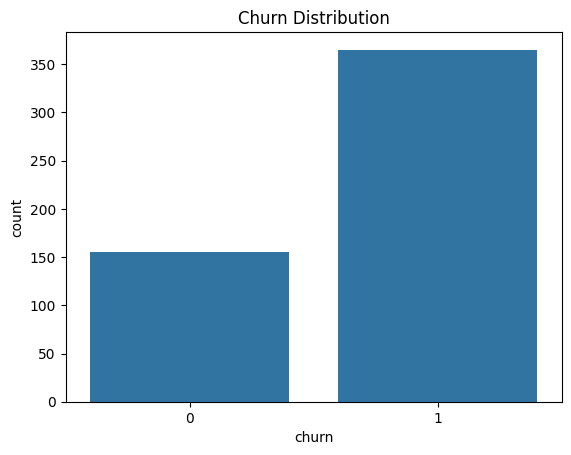

In [ ]:
#Churn Distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()



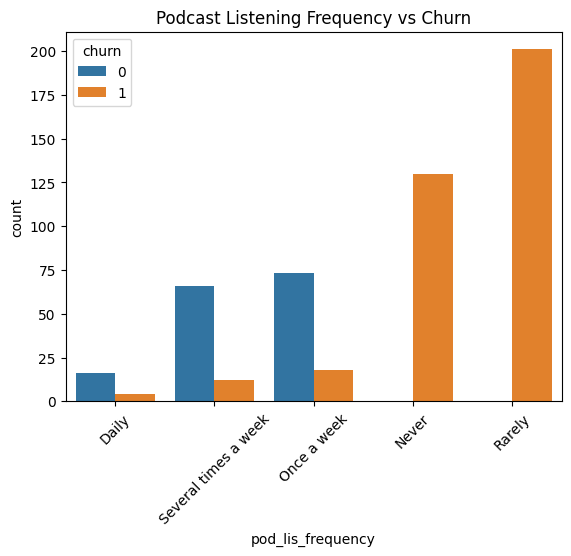

In [ ]:
#Podcast frequency vs churn
sns.countplot(x='pod_lis_frequency', hue='churn', data=df)
plt.title("Podcast Listening Frequency vs Churn")
plt.xticks(rotation=45)
plt.show()


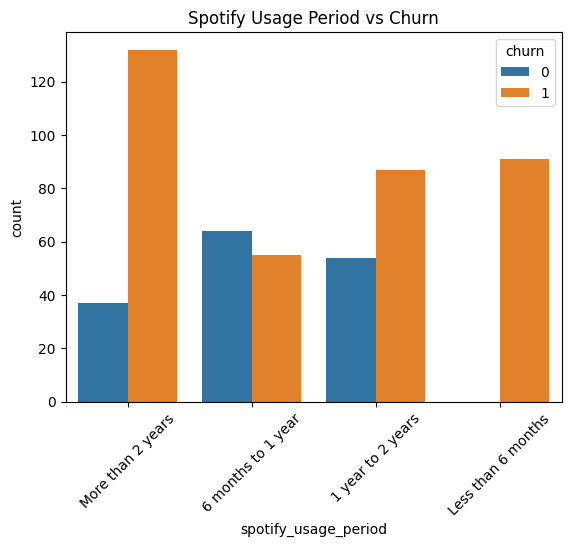

In [ ]:
#Usage period vs churn
sns.countplot(x='spotify_usage_period', hue='churn', data=df)
plt.title("Spotify Usage Period vs Churn")
plt.xticks(rotation=45)
plt.show()


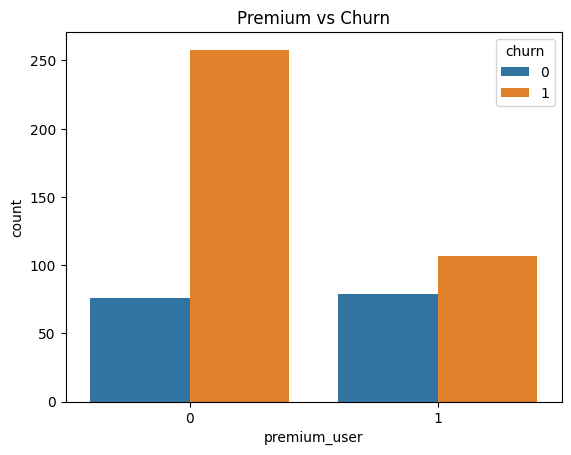

In [ ]:
#Premium vs churn
sns.countplot(x='premium_user', hue='churn', data=df)
plt.title("Premium vs Churn")
plt.show()

In [ ]:
df['premium_user'] = df['premium_sub_willingness'].map({'Yes':1, 'No':0})

In [ ]:
#Podcast Listening Frequency Score
freq_map = {
    'Daily':5,
    'Several times a week':4,
    'Once a week':3,
    'Rarely':2,
    'Never':1
}
df['pod_freq_score'] = df['pod_lis_frequency'].map(freq_map)


In [ ]:
df[['pod_lis_frequency', 'pod_freq_score']].head()


,pod_lis_frequency,pod_freq_score
0,Daily,5
1,Several times a week,4
2,Once a week,3
3,Never,1
4,Rarely,2


In [ ]:
#Usage Period Score
usage_map = {
    'Less than 6 months':1,
    '6 months to 1 year':2,
    '1 year to 2 years':3,
    'More than 2 years':4
}
df['usage_score'] = df['spotify_usage_period'].map(usage_map)


In [ ]:
#Satisfaction Score
sat_map = {
    'Very Dissatisfied':1,
    'Dissatisfied':2,
    'Ok':3,
    'Satisfied':4,
    'Very Satisfied':5
}
df['satisfaction_score'] = df['pod_variety_satisfaction'].map(sat_map)


In [ ]:
#Creating Management Feature
# df['engagement_score'] = (
#     df['daily_play_time'] +
#     df['liked_songs'] +
#     df['playlist_adds']
# )

# df['skip_rate'] = df['num_skips'] / (df['daily_play_time'] + 1)

# df['inactive_flag'] = np.where(df['days_since_last_login'] > 30, 1, 0)


In [ ]:
display(df.head())

,age,gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,...,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction,premium_user,churn,pod_freq_score,usage_score,satisfaction_score
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,...,Comedy,Interview,Both,Both,Ok,1,0,5,4,3
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,...,Comedy,Interview,Both,Unknown,Satisfied,1,0,4,4,4
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,...,Sports,Interview,Unknown,Both,Satisfied,1,0,3,2,4
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,Unknown,Music,Melody,Night,...,Unknown,Unknown,Unknown,Unknown,Ok,0,1,1,3,3
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,Unknown,Music,Melody,Night,...,Lifestyle and Health,Story telling,Well known individuals,Both,Ok,0,1,2,3,3


In [ ]:
print(df.columns.tolist())


['age', 'gender', 'spotify_usage_period', 'spotify_listening_device', 'spotify_subscription_plan', 'premium_sub_willingness', 'preffered_premium_plan', 'preferred_listening_content', 'fav_music_genre', 'music_time_slot', 'music_influencial_mood', 'music_lis_frequency', 'music_expl_method', 'music_recc_rating', 'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction', 'premium_user', 'churn', 'pod_freq_score', 'usage_score', 'satisfaction_score']


In [ ]:
#Training Model
required_features = [
    'premium_user',
    'pod_freq_score',
    'usage_score',
    'satisfaction_score'
]

y = df['churn']


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = df[required_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

#Using XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        73

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

ROC-AUC: 1.0


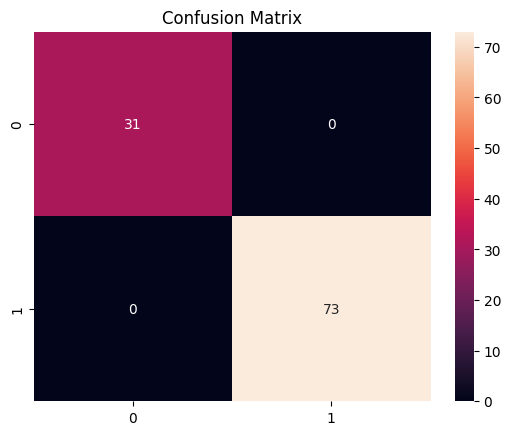

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#Prediction
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

#Metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

#Confusion Metrics
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


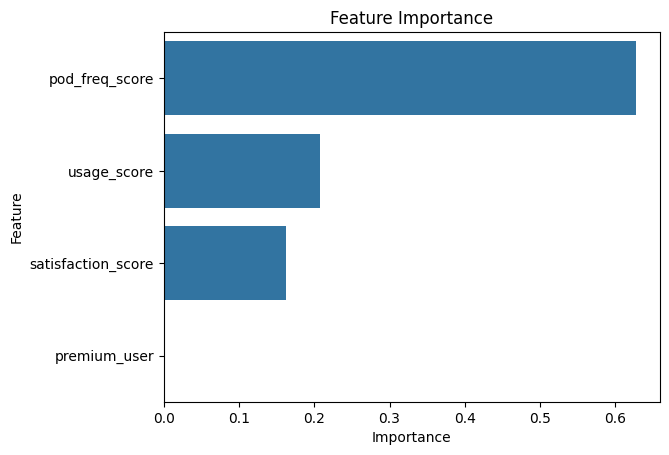

In [ ]:
importance = pd.DataFrame({
    'Feature': required_features,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Feature Importance")
plt.show()

In [ ]:
#churn Probability and Risk Segmentation
df['churn_probability'] = xgb.predict_proba(X)[:,1]

df['risk_segment'] = pd.cut(
    df['churn_probability'],
    bins=[0, 0.4, 0.7, 1],
    labels=['Low Risk','Medium Risk','High Risk']
)


In [ ]:
print(df.head())
print(df[['churn', 'churn_probability', 'risk_segment']].head())
print(df['churn'].value_counts(normalize=True))


     age  gender spotify_usage_period  \
0  20-35  Female    More than 2 years   
1  12-20    Male    More than 2 years   
2  35-60  Others   6 months to 1 year   
3  20-35  Female    1 year to 2 years   
4  20-35  Female    1 year to 2 years   

                         spotify_listening_device spotify_subscription_plan  \
0              Smart speakers or voice assistants       Free (ad-supported)   
1                              Computer or laptop       Free (ad-supported)   
2              Smart speakers or voice assistants       Free (ad-supported)   
3  Smartphone, Smart speakers or voice assistants       Free (ad-supported)   
4                                      Smartphone       Free (ad-supported)   

  premium_sub_willingness          preffered_premium_plan  \
0                     Yes        Family Plan-Rs 179/month   
1                     Yes  Individual Plan- Rs 119/ month   
2                     Yes        Student Plan-Rs 59/month   
3                      No         

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb
}

results = []

for name, model in models.items():
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:,1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred),
        "Recall": recall_score(y_test, pred),
        "F1 Score": f1_score(y_test, pred),
        "ROC-AUC": roc_auc_score(y_test, prob)
    })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.913462,0.944444,0.931507,0.937931,0.97437
1,Random Forest,1.000000,1.000000,1.000000,1.000000,1.00000
2,XGBoost,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df.to_csv("Spotify_churn_final.csv", index=False)
